In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('education.csv')

In [21]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [22]:
data.NationalITy.unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [23]:
data.PlaceofBirth.unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

In [24]:
data.replace({'KW':'KuwaIT'},inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [26]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [27]:
features = data.columns
features

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [29]:
obj_cols = data.select_dtypes(include='object').columns
obj_cols

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [30]:
num_cols =  data.select_dtypes(exclude='object').columns
num_cols

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object')

In [31]:
for i in obj_cols:
    print( data[i].value_counts(),end='\n')

M    305
F    175
Name: gender, dtype: int64
KuwaIT         179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Lybia            6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
A    283
B    167
C     30
Name: SectionID, dtype: int64
IT           95
French       65
Arabic       59
Science      51
E

#  Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


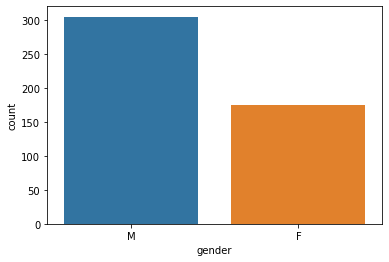

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


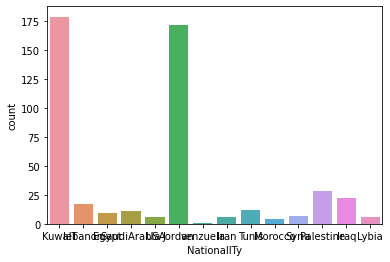

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


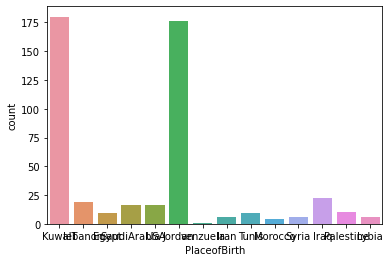

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


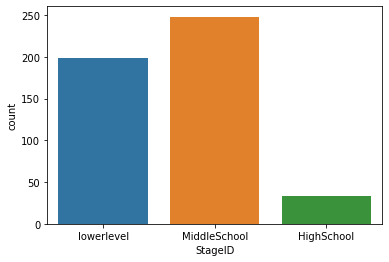

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


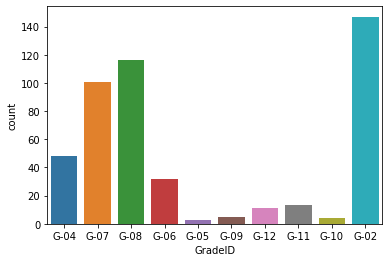

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


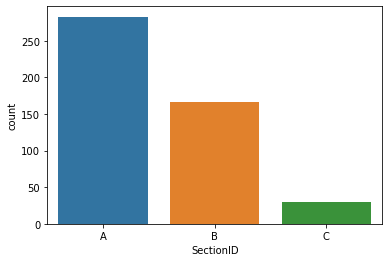

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


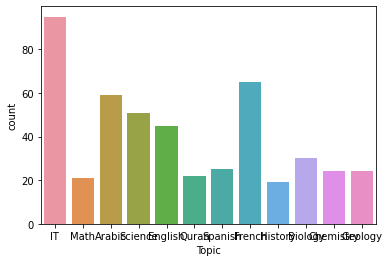

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


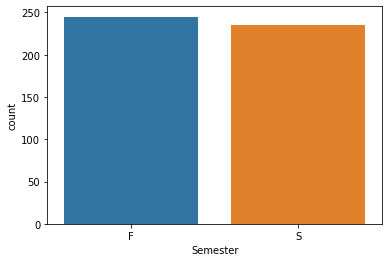

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


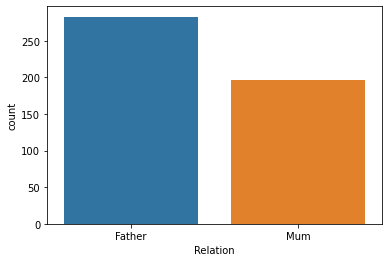

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


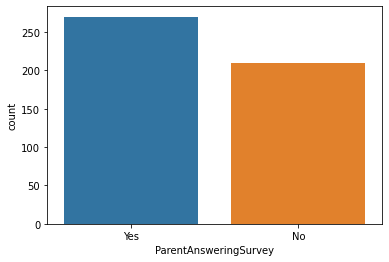

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


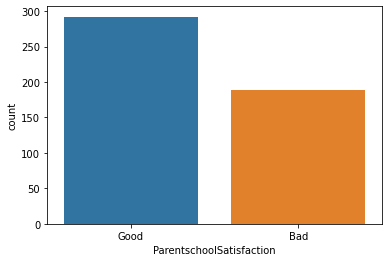

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


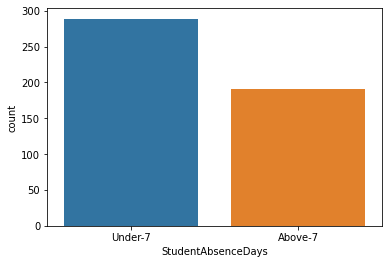

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


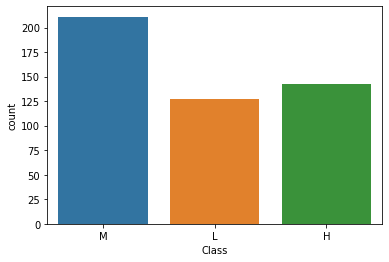

In [32]:
for i in obj_cols:
    sns.countplot( data[i])
    plt.show()

# Look at some categorical features in relation to each other, to see what insights could be possibly read?

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Topic', ylabel='count'>

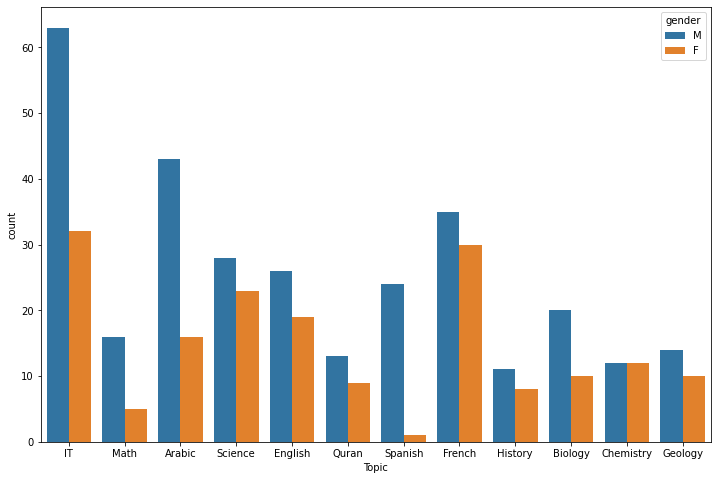

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(data['Topic'],hue=data['gender'])

###  from this graph we get
###     *  male students mostly preferred IT ,Arabic,Math,Spanish
###     *  Spanish topic is less chosen by female students
###     *  both male and female students chosen chemistry .gelogy and history equally

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StageID', ylabel='count'>

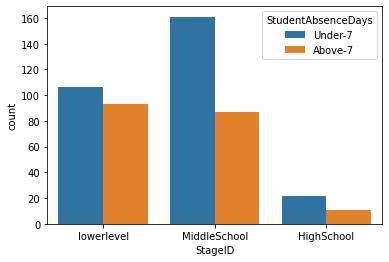

In [50]:
sns.countplot(data['StageID'],hue=data['StudentAbsenceDays'])

### percentage of students with above-7 absentees were maximum in lower school and minimum in highschool

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

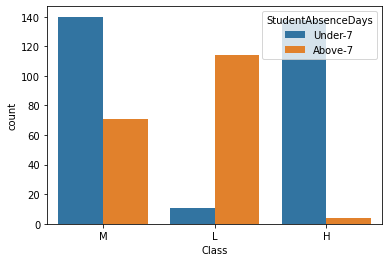

In [76]:
sns.countplot(data['Class'],hue=data['StudentAbsenceDays'])

### In lower class  the number of students with absentess above-7 is maximum and minimum in higher class

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

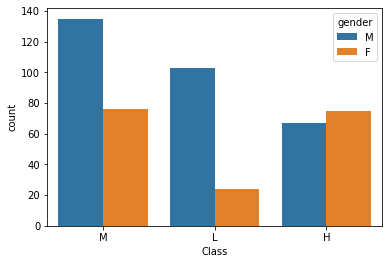

In [22]:
sns.countplot(data['Class'],hue=data['gender'])

### from this graph we conclude 
###    * low and medium class students are male
###    * high class students are female

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Topic', ylabel='count'>

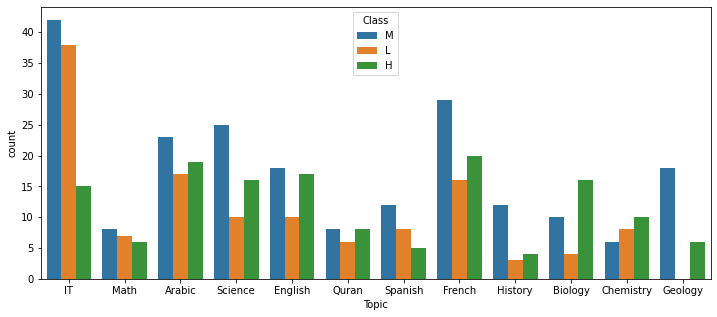

In [62]:
plt.figure(figsize=(12,5))
sns.countplot(data['Topic'],hue=data['Class'])

In [31]:
pd.set_option('display.max_rows',500)

In [62]:
data.loc[data['NationalITy']==data['PlaceofBirth']]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KuwaIT,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KuwaIT,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KuwaIT,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KuwaIT,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


<AxesSubplot:xlabel='NationalITy,PlaceofBirth'>

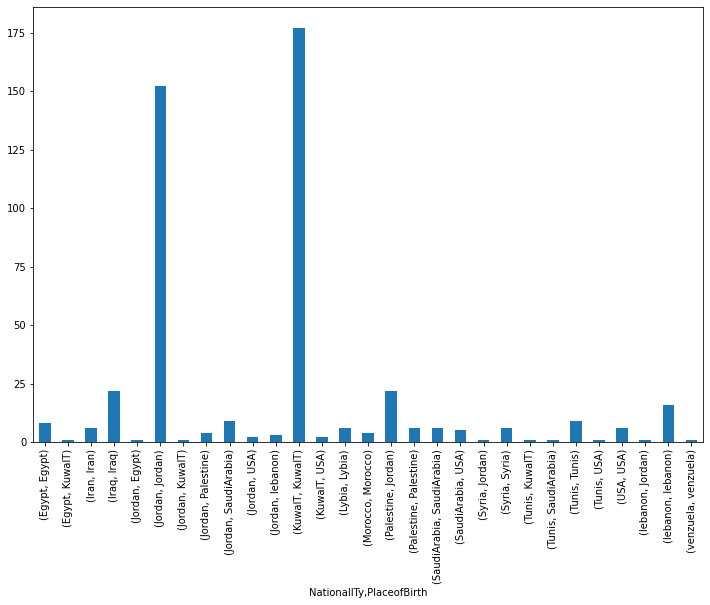

In [75]:
plt.figure(figsize=(12,8))
data.groupby(['NationalITy','PlaceofBirth'])['gender'].count().plot.bar()

### From this graph we differentiate
###    *  number of people's birthplace and citizenship were same
###    * number of people's  place of birth and citizenship country were different  

# comparing the numerical and categorical features

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ParentschoolSatisfaction', ylabel='count'>

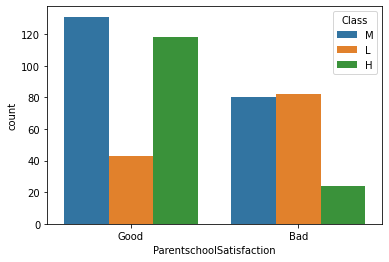

In [79]:
sns.countplot(data['ParentschoolSatisfaction'],hue=data['Class'])

<AxesSubplot:xlabel='gender', ylabel='raisedhands'>

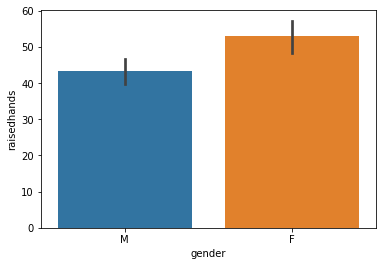

In [38]:
sns.barplot(x=data['gender'],y=data['raisedhands'])

### female students raise hands more than male students

<AxesSubplot:xlabel='Topic', ylabel='raisedhands'>

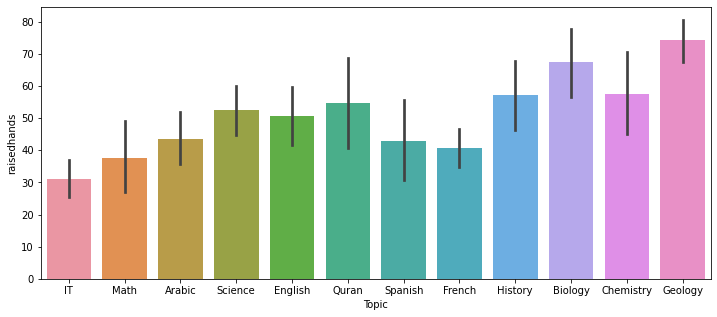

In [58]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['Topic'],y=data['raisedhands'])

### > geology students were raised hands mostly
### > while it students were least in raising hands

<AxesSubplot:xlabel='Topic', ylabel='VisITedResources'>

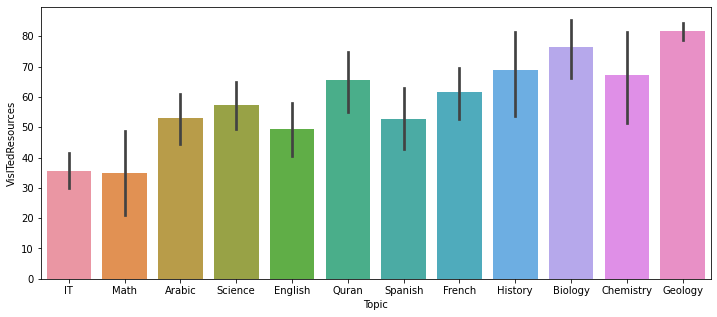

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['Topic'],y=data['VisITedResources'])

### > geology students visited maximum number of resourses
### > while IT and math students visited minimum number of resourses

<AxesSubplot:xlabel='StageID', ylabel='Discussion'>

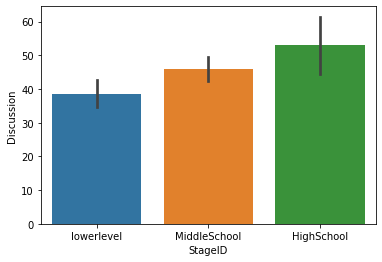

In [49]:
sns.barplot(x=data['StageID'],y=data['Discussion'])

### this graph shows
###   * minimum discussions in lowerlevel and maximum discussion in higher level
###   * thus stage id and discussions were directly proportional

<AxesSubplot:xlabel='StageID', ylabel='VisITedResources'>

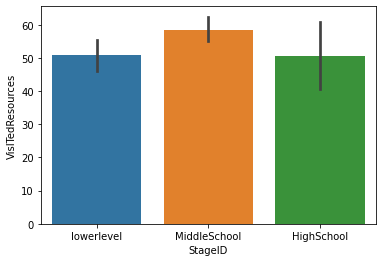

In [57]:
sns.barplot(x=data['StageID'],y=data['VisITedResources'])

<AxesSubplot:xlabel='StageID', ylabel='raisedhands'>

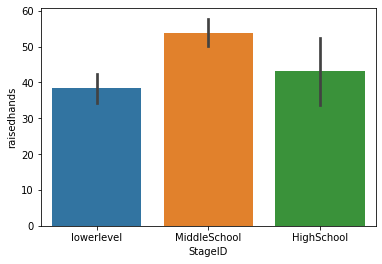

In [59]:
sns.barplot(x=data['StageID'],y=data['raisedhands'])

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

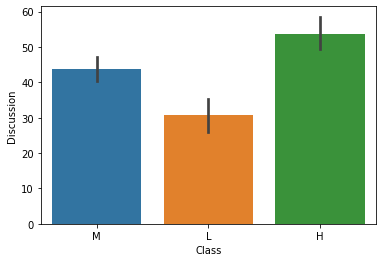

In [53]:
sns.barplot(x=data.Class,y=data.Discussion)

### lower class students made minimum number of discussions while higher class students made  maximum number of discussion

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

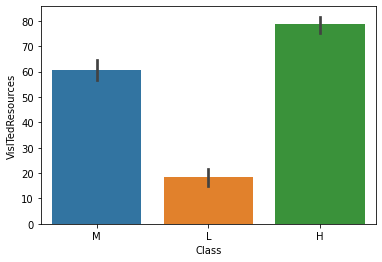

In [55]:
sns.barplot(x=data.Class,y=data.VisITedResources)

### lower class students visited minimum number of resourses while high class students visited maximum number of resourses

<AxesSubplot:xlabel='Class', ylabel='AnnouncementsView'>

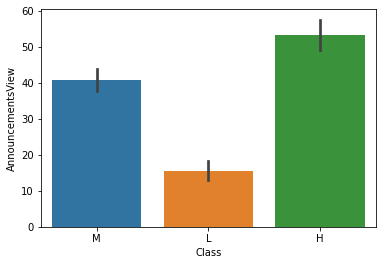

In [56]:
sns.barplot(x= data.Class,y=data.AnnouncementsView)

# From the above result, what are the factors that leads to get low grades of the students?

###     1) number of absentees influences the class,students in lower class took maximum number of absentees while students in higher class took minimum number of absentees

###    2) students in higher class made maximum number of discussions while studenys in lower calss made minimum number of discussions

###   3)  students in higher calss visited maximum number of resourses while students in lower class visited minimum number of resourses  

### 4) parents school satistification minimum in lower class and maximum in higer

# Build classification model and present it's classification report?

In [74]:
data.drop_duplicates(inplace=True)

In [75]:
data.reset_index(inplace=True)

# encoding

In [80]:
data=pd.get_dummies(data=data, columns=['gender','NationalITy','PlaceofBirth', 'Topic', 'Relation','ParentAnsweringSurvey', 'ParentschoolSatisfaction','StudentAbsenceDays'])

In [81]:
pd.set_option('display.max_rows',500)

In [82]:
data

,index,StageID,GradeID,SectionID,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,...,Topic_Science,Topic_Spanish,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,0,lowerlevel,G-04,A,F,15,16,2,20,M,...,0,0,1,0,0,1,0,1,0,1
1,1,lowerlevel,G-04,A,F,20,20,3,25,M,...,0,0,1,0,0,1,0,1,0,1
2,2,lowerlevel,G-04,A,F,10,7,0,30,L,...,0,0,1,0,1,0,1,0,1,0
3,3,lowerlevel,G-04,A,F,30,25,5,35,L,...,0,0,1,0,1,0,1,0,1,0
4,4,lowerlevel,G-04,A,F,40,50,12,50,M,...,0,0,1,0,1,0,1,0,1,0
5,5,lowerlevel,G-04,A,F,42,30,13,70,M,...,0,0,1,0,0,1,1,0,1,0
6,6,MiddleSchool,G-07,A,F,35,12,0,17,L,...,0,0,1,0,1,0,1,0,1,0
7,7,MiddleSchool,G-07,A,F,50,10,15,22,M,...,0,0,1,0,0,1,0,1,0,1
8,8,MiddleSchool,G-07,A,F,12,21,16,50,M,...,0,0,1,0,0,1,0,1,0,1
9,9,MiddleSchool,G-07,B,F,70,80,25,70,M,...,0,0,1,0,0,1,0,1,0,1


In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          478 non-null    int64 
 1   StageID                        478 non-null    object
 2   GradeID                        478 non-null    object
 3   SectionID                      478 non-null    object
 4   Semester                       478 non-null    object
 5   raisedhands                    478 non-null    int64 
 6   VisITedResources               478 non-null    int64 
 7   AnnouncementsView              478 non-null    int64 
 8   Discussion                     478 non-null    int64 
 9   Class                          478 non-null    object
 10  gender_F                       478 non-null    uint8 
 11  gender_M                       478 non-null    uint8 
 12  NationalITy_Egypt              478 non-null    uint8 
 13  Natio

In [85]:
obj_cols=data.select_dtypes(include=object).columns

In [86]:
for i in obj_cols:
    data[i]=le.fit_transform(data[i])

In [87]:
data

,index,StageID,GradeID,SectionID,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,...,Topic_Science,Topic_Spanish,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,0,2,1,0,0,15,16,2,20,2,...,0,0,1,0,0,1,0,1,0,1
1,1,2,1,0,0,20,20,3,25,2,...,0,0,1,0,0,1,0,1,0,1
2,2,2,1,0,0,10,7,0,30,1,...,0,0,1,0,1,0,1,0,1,0
3,3,2,1,0,0,30,25,5,35,1,...,0,0,1,0,1,0,1,0,1,0
4,4,2,1,0,0,40,50,12,50,2,...,0,0,1,0,1,0,1,0,1,0
5,5,2,1,0,0,42,30,13,70,2,...,0,0,1,0,0,1,1,0,1,0
6,6,1,4,0,0,35,12,0,17,1,...,0,0,1,0,1,0,1,0,1,0
7,7,1,4,0,0,50,10,15,22,2,...,0,0,1,0,0,1,0,1,0,1
8,8,1,4,0,0,12,21,16,50,2,...,0,0,1,0,0,1,0,1,0,1
9,9,1,4,1,0,70,80,25,70,2,...,0,0,1,0,0,1,0,1,0,1


## prevelance rate

In [88]:
data['Class'].value_counts(normalize=True)*100

2    44.142259
0    29.707113
1    26.150628
Name: Class, dtype: float64

In [89]:
x=data.drop(['Class'],axis=1)
y=data['Class']

In [90]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [91]:
print('train prevelance rate:\n',ytrain.value_counts(normalize=True)*100)

train prevelance rate:
 2    42.814371
0    31.736527
1    25.449102
Name: Class, dtype: float64


In [92]:
print('test prevelance rate:\n',ytest.value_counts(normalize=True)*100)

test prevelance rate:
 2    47.222222
1    27.777778
0    25.000000
Name: Class, dtype: float64


In [93]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
xtrain = scalar.fit_transform(xtrain)

In [94]:
xtest = scalar.fit_transform(xtest)


In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [96]:
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)

In [97]:
y_train_pred_prob=model.predict_proba(xtrain)
y_test_pred_prob=model.predict_proba(xtest)

In [98]:
np.argmax(y_test_pred_prob,axis=1)

array([2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0,
       2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2], dtype=int64)

In [99]:
y_test_pred

array([2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0,
       2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2])

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
accuracy_train=accuracy_score(ytest,y_test_pred)
accuracy_test=accuracy_score(ytrain,y_train_pred)
accuracy_train,accuracy_test

(0.7569444444444444, 0.8682634730538922)

In [102]:
confusion_matrix(ytest,y_test_pred)

array([[31,  0,  5],
       [ 0, 29, 11],
       [17,  2, 49]], dtype=int64)

In [103]:
confusion_matrix(ytest,y_test_pred)

array([[31,  0,  5],
       [ 0, 29, 11],
       [17,  2, 49]], dtype=int64)

In [104]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74        36
           1       0.94      0.72      0.82        40
           2       0.75      0.72      0.74        68

    accuracy                           0.76       144
   macro avg       0.78      0.77      0.76       144
weighted avg       0.78      0.76      0.76       144



In [105]:
print(classification_report(ytrain,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       106
           1       0.90      0.91      0.90        85
           2       0.87      0.83      0.85       143

    accuracy                           0.87       334
   macro avg       0.87      0.88      0.87       334
weighted avg       0.87      0.87      0.87       334

